# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, how='outer')

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Checking the number of mice.
unique_mice = combined_df['Mouse ID'].nunique()
unique_mice


249

In [12]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Get count duplicates for each unique row
df = combined_df.groupby(combined_df.columns.tolist(), as_index=False).size()
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,size
0,a203,Infubinol,Female,20,23,0,45.000000,0,1
1,a203,Infubinol,Female,20,23,5,48.508468,0,1
2,a203,Infubinol,Female,20,23,10,51.852437,1,1
3,a203,Infubinol,Female,20,23,15,52.777870,1,1
4,a203,Infubinol,Female,20,23,20,55.173336,1,1
...,...,...,...,...,...,...,...,...,...
1887,z969,Naftisol,Male,9,30,25,63.145652,2,1
1888,z969,Naftisol,Male,9,30,30,65.841013,3,1
1889,z969,Naftisol,Male,9,30,35,69.176246,4,1
1890,z969,Naftisol,Male,9,30,40,70.314904,4,1


In [13]:
duplicates = df.loc[df['size'] > 1]
print(duplicates)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
586     g989     Propriva  Female          21          26          0   

     Tumor Volume (mm3)  Metastatic Sites  size  
586                45.0                 0     2  


In [14]:
# Optional: Get all the data for the duplicate mouse ID. 
filter = combined_df['Mouse ID'] == 'g989'
g989_df = combined_df.loc[filter, :]
g989_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_df = combined_df.drop_duplicates(subset=['MouseID', 'Timepoint'])
#clean_df
clean_df = combined_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [16]:
# check that duplicates were removed
filter = clean_df['Mouse ID'] == 'g989'
g989_df = clean_df.loc[filter, :]
g989_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2


In [17]:
# Checking the number of mice in the clean DataFrame.
unique_mice = clean_df['Mouse ID'].nunique()
unique_mice

249

## Summary Statistics

In [71]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
drug_regimen_df = clean_df[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen')
# mean_numpy = round(np.mean(drug_regimen_df['Tumor Volume (mm3)']),2)
# median_numpy = round(np.median(drug_regimen_df['Tumor Volume (mm3)']), 2)
# variance_np = round(np.var(drug_regimen_df['Tumor Volume (mm3)']), 2)
# sd_numpy = round(np.std(drug_regimen_df['Tumor Volume (mm3)'],ddof = 0), 2)
# SEM_numpy = round(sem(drug_regimen_df['Tumor Volume (mm3)']), 2)

mean = drug_regimen_df['Tumor Volume (mm3)'].mean()
median = drug_regimen_df['Tumor Volume (mm3)'].median()
variance = drug_regimen_df['Tumor Volume (mm3)'].var()
sd = drug_regimen_df['Tumor Volume (mm3)'].std()
SEM = drug_regimen_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats_df = pd.DataFrame({'mean': mean, 
                             'median': median,
                             'variance': variance,
                             'standard deviation': sd,
                             'standard error of mean': SEM
                             }, index=drug_regimen_df['Drug Regimen'].unique())
summary_stats_df

,mean,median,variance,standard deviation,standard error of mean
Drug Regimen,,,,,
[Capomulin],40.675741,41.557809,24.947764,4.994774,0.329346
[Ceftamin],52.591172,51.776157,39.290177,6.268188,0.469821
[Infubinol],52.884795,51.820584,43.128684,6.567243,0.492236
[Ketapril],55.235638,53.698743,68.553577,8.279709,0.603860
[Naftisol],54.331565,52.509285,66.173479,8.134708,0.596466
[Placebo],54.033581,52.288934,61.168083,7.821003,0.581331
[Propriva],52.458254,50.854632,44.053659,6.637293,0.540135
[Ramicane],40.216745,40.673236,23.486704,4.846308,0.320955
[Stelasyn],54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
adv_sum_stat_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean="mean",
    Median="median",
    Variance="var",
    StdDev="std",
    SEM="sem"
)
adv_sum_stat_df


,Mean,Median,Variance,StdDev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts


<Axes: title={'center': 'Total Number of Rows for Each Drug Regimen'}, xlabel='Drug Regimen', ylabel='# of Rows'>

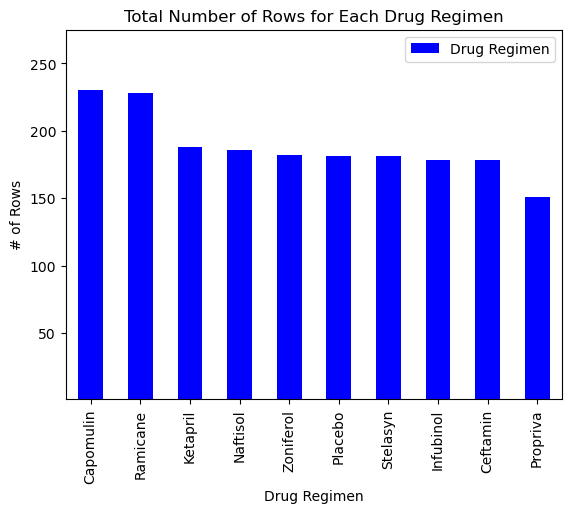

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_df['Drug Regimen'].value_counts()
regimen_counts_df = pd.DataFrame({
    'Drug': ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
    'Count': ['230', '228', '188', '186', '182', '181', '181', '178', '178', '151']
    })
regimen_counts.plot(kind='bar', title='Total Number of Rows for Each Drug Regimen', xlabel='Drug Regimen', ylabel='# of Rows', color='blue', legend='best', ylim=(1, 275))

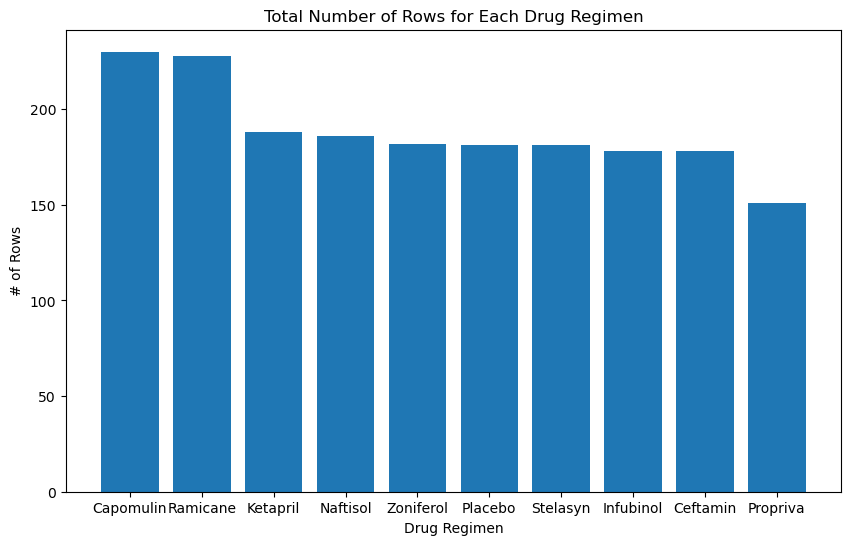

In [21]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(10,6))
plt.bar(regimen_counts.index, regimen_counts.values, align="center")
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Rows")
plt.show()

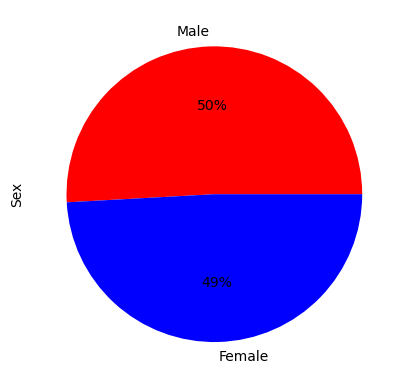

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# label sections of the pie chart
gender_df = clean_df['Sex'].value_counts()
gender_df.plot(kind='pie', autopct='%0.0d%%', colors=['red','blue'])
plt.show()

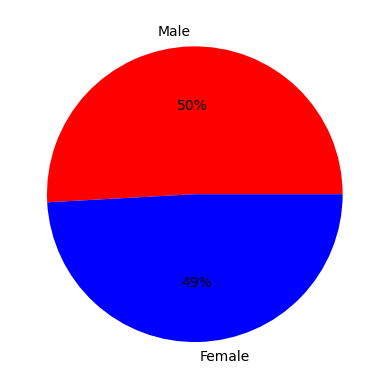

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_df, labels=gender_df.index, autopct='%0.0d%%', colors=['red', 'blue'])
plt.show()

## Quartiles, Outliers and Boxplots


The lower quartile of tumor volume is: 47.2084271125
The upper quartile of tumor volume is: 56.801437570000004
The interquartile range of tumor volumes is: 9.593010457500007
The the median of tumor volumes is: 51.77615728 
Values below 32.81891142624998 could be outliers.
Values above 71.19095325625001 could be outliers.


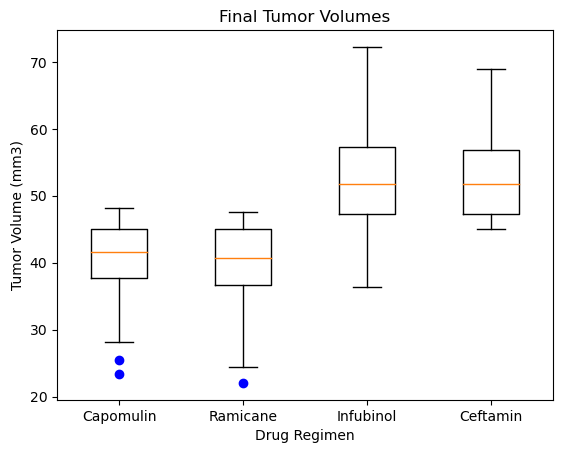

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
timepoint_df = clean_df.groupby('Mouse ID')['Timepoint'].max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_df = pd.merge(timepoint_df, clean_df, on='Mouse ID')

# Put treatments into a list for for loop (and later for plot labels)
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in regimens:
    mice = merge_df[merge_df['Drug Regimen'] == drug]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = mice['Tumor Volume (mm3)']
    tumor_data.append(final_tumor_vol)

    # add subset 

    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volumes is: {iqr}")
print(f"The the median of tumor volumes is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_data, labels=regimens, sym='b')
plt.title('Final Tumor Volumes')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.show()


## Line and Scatter Plots


/var/folders/13/62j627ws4c74l5c6fzxjrp_00000gn/T/ipykernel_43012/432728595.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  i557_df = clean_df[clean_df['Drug Regimen'] == 'Capomulin'][clean_df['Mouse ID'] == 'i557']


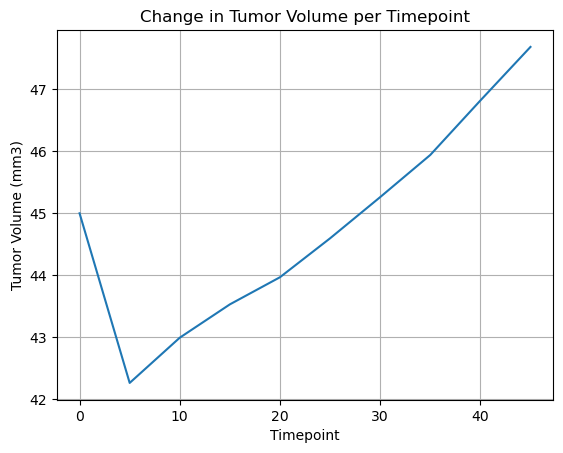

In [25]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
i557_df = clean_df[clean_df['Drug Regimen'] == 'Capomulin'][clean_df['Mouse ID'] == 'i557']
# Build a line plot for each data type
plt.plot(i557_df['Timepoint'], i557_df['Tumor Volume (mm3)'], linestyle='-')

# Incorporate the other graph properties
plt.title("Change in Tumor Volume per Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.grid(True)

# Show plot
plt.show()

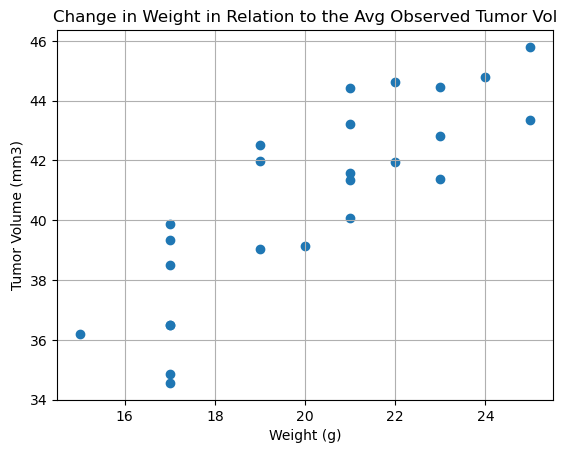

In [26]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_mice = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Build a line plot for each data type
average_weight = capomulin_mice.groupby('Mouse ID')['Weight (g)'].mean()
average_tumor = capomulin_mice.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
plt.scatter(average_weight, average_tumor, marker='o')

# Incorporate the other graph properties
plt.title("Change in Weight in Relation to the Avg Observed Tumor Vol")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.grid(True)

# Show plot
plt.show()


## Correlation and Regression


The correlation between both factors is 0.84
The linear regression model for mouse weight and average observed tumor volume for the entire Capomulin treatment group is y = 0.74x + -10.15
The r-squared is: 0.7088568047708723


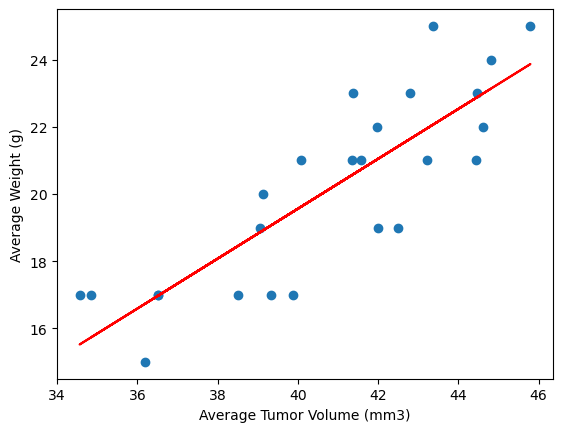

In [27]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(average_weight,average_tumor)
x_values = average_tumor
y_values = average_weight
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Average Tumor Volume (mm3)')
plt.ylabel('Average Weight (g)')
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f'The linear regression model for mouse weight and average observed tumor volume for the entire Capomulin treatment group is {line_eq}')
print(f"The r-squared is: {rvalue**2}")
plt.show()